# Facebook Checkin Prediction
## Udacity Machine Learning Nanodegree Capstone Project

## Data Import

In [1]:
%matplotlib inline
# Import Libraries


# Filter a deprecation warning which would require reshaping data twice in "predict" mode
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd

# Clear memory on initialize
test_df = None
train_df = None
train_data = None
test_data = None
formatted_feature_df = None
reduced_data = None
formatted_reduced_data = None


# Import Data
train_data = pd.read_csv("data/train.csv")
print "Training data loaded successfully"
print len(train_data)


Training data loaded successfully
29118021


## Data Formatting and Transformation
This section is used to perform any data reduction on the original dataset before proceeding. In some cases this step performs no function at all (if we are proceeding with the entire dataset for instance).

In [2]:
# Reduce the data to coordinate sets, minimum of 0.0 maximum of 10.0, this reduces overall working dataset size while
# maintaining neighbor relationships.

min_x = 0.0
max_x = 10.0
min_y = 0.0
max_y = 10.0

reduced_data = train_data[(train_data['x'] >= min_x) & (train_data['x'] <= max_x) & (train_data['y'] >= min_y) & (train_data['y'] <= max_y)]

# Remove csv import from Memory
train_data = None

# Cursory validation that data is imported properly
print reduced_data.head()

   row_id       x       y  accuracy    time    place_id
0       0  0.7941  9.0809        54  470702  8523065625
1       1  5.9567  4.7968        13  186555  1757726713
2       2  8.3078  7.0407        74  322648  1137537235
3       3  7.3665  2.5165        65  704587  6567393236
4       4  4.0961  1.1307        31  472130  7440663949


In [3]:
#remove original import if all data formatting is complete to save memory if necessary
train_data = None
test_data = None

## Statistics and Visualization
This section will provide basic statistic and graphical representations of the data correlated to the report section of the same name.

### Basic information about the dataset

In [4]:
# Run diagnostics after import

print "Training Data Length: " + str(len(reduced_data.index))


# Basic Statistics
print "\nUnique places in training set: " + str(reduced_data.place_id.nunique())
print "\nUnique X coordinates in training set: " + str(reduced_data.x.nunique())
print "\nMinimum and Maximum X coordiante: " + str(reduced_data.x.min()) + " " + str(reduced_data.x.max())
print "\nUnique Y coordinates in training set: " + str(reduced_data.y.nunique())
print "\nMinimum and Maximum Y coordiante: " + str(reduced_data.y.min()) + " " + str(reduced_data.y.max())
print "\nUnique timestamps in training set: " + str(reduced_data.time.nunique())
print "\nMinimum timestamp in training set: " + str(reduced_data.time.min())
print "\nMaximum timestamp in training set: " + str(reduced_data.time.max())
print "\nUnique accuracy measures in training set: " + str(reduced_data.accuracy.nunique())

Training Data Length: 29118021

Unique places in training set: 108390

Unique X coordinates in training set: 100001

Minimum and Maximum X coordiante: 0.0 10.0

Unique Y coordinates in training set: 100001

Minimum and Maximum Y coordiante: 0.0 10.0

Unique timestamps in training set: 786239

Minimum timestamp in training set: 1

Maximum timestamp in training set: 786239

Unique accuracy measures in training set: 1025


### Feature reformatting
In this section, features such as time will be reformatted to more useful formats as discussed in the associated report.

In this case, the time will be reduced from completely linear, into a Day of the Week, Hour of the Day formatted as 0-6 for the day and 0-23 for the hour and split into two columns

In [5]:
from pandas import *
def SetDay(x):
    x = float(x)
    day_of_week = x/(60*24*7) - int(x/(60*24*7))
    day_exact = day_of_week*7
    day = int(day_exact)
    hour_exact = (day_exact - day)*24
    hour = int(hour_exact)
    return day, hour

reduced_data["day"], reduced_data["hour"] = zip(*reduced_data["time"].map(SetDay))

print reduced_data.head()

   row_id       x       y  accuracy    time    place_id  day  hour
0       0  0.7941  9.0809        54  470702  8523065625    4    21
1       1  5.9567  4.7968        13  186555  1757726713    3    13
2       2  8.3078  7.0407        74  322648  1137537235    0     1
3       3  7.3665  2.5165        65  704587  6567393236    6     7
4       4  4.0961  1.1307        31  472130  7440663949    5    20


### Graphical Representation of the Dataset

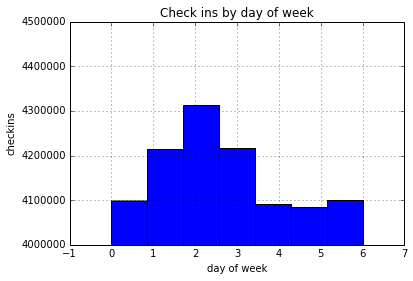

In [100]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


# the histogram of the data
plt.hist(reduced_data['day'], 7)


plt.xlabel('day of week')
plt.ylabel('checkins')
plt.title('Check ins by day of week')
plt.axis([-1, 7, 4000000, 4500000])
plt.grid(True)
plt.show()

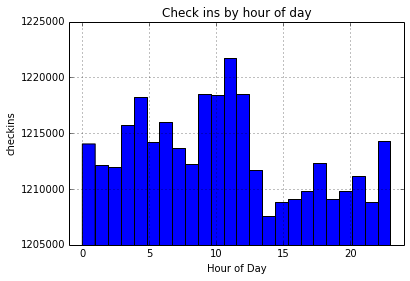

In [101]:
plt.hist(reduced_data['hour'], 24)


plt.xlabel('Hour of Day')
plt.ylabel('checkins')
plt.title('Check ins by hour of day')
plt.axis([-1, 24, 1205000, 1225000])
plt.grid(True)
plt.show()

### Sample data and plot in x,y space

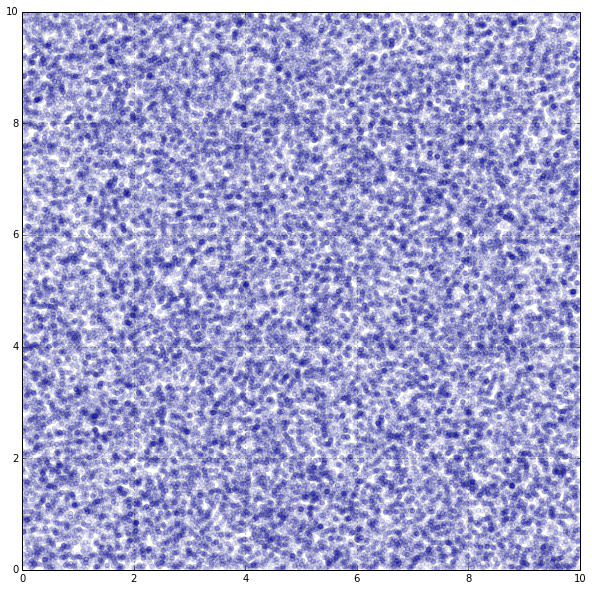

In [102]:
sample_data = reduced_data.sample(n=50000)
plt.figure(num=None, figsize=(10, 10), facecolor='w', edgecolor='k')
plt.scatter(sample_data["x"], sample_data["y"], marker = "o", alpha=0.1)
plt.axis([0,10,0,10])
plt.grid(True)
plt.show()

### Explore Accuracy

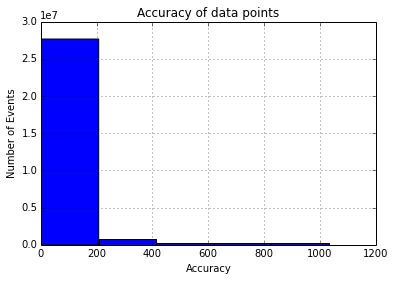

In [103]:
plt.hist(reduced_data['accuracy'], 5)


plt.xlabel('Accuracy')
plt.ylabel('Number of Events')
plt.title('Accuracy of data points')
plt.grid(True)
plt.show()

#### Notes on Accuracy
Without any information as to what "accuracy" really means in the context of this problem, it has to be assumed that it is related to GPS accuracy down to some measurement. It is my belief that a lower number would mean that the GPS signal is more accurate, whether it be accounted for in this problem or not which would be unrelated to a person's behavior and would only serve to create a "noisy" GPS signal. With that in mind, there are two methods for proceeding, one would be to ignore the accuracy metric entirely, second would be to filter out accuracy metrics that fell outside of some statistical measurement. For this problem I will take data within one standard deviation of the mean and disregard all others.

### Statistical Analysis of the Dataset

From the previous section it is apparent that there is very little variation in checkin behavior by GPS coordinate, by time of the day, or by day of the week. The plot of x,y data does reveal local concentrations which could be considered to be "popular" check-in spots. Since the check-in ID's are simply randomly assigned values, statistical analysis of those values would be mostly meaningless. From this point it is apparent that this is a very difficult machine learning problem with no obvious patterns or data concentrations.

The only statistical analysis that will be done on this problem will be to filter the accuracy metric.

By my estimation, basic statistical measurements on this dataset other than accuracy will not reveal anything. I will proceed to the machine learning portion of this report after filtering the accuracy metrics. 

In [6]:
average = np.mean(reduced_data['accuracy'])
standard_dev = np.std(reduced_data['accuracy'])
minimum_accuracy = average - standard_dev
maximum_accuracy = average + standard_dev
print "Average Accuracy " + str(average)
print "\nStandard Deviation " + str(standard_dev)
print "\nMinimum Accuracy " + str(minimum_accuracy)
print "\nMaximum Accuracy " + str(maximum_accuracy)

Average Accuracy 82.8491249457

Standard Deviation 114.751770383

Minimum Accuracy -31.9026454374

Maximum Accuracy 197.600895329


## Final Data Formatting
Remove original timestamps, analyze accuracy measures and filter data.

In [7]:
formatted_reduced_data = reduced_data[reduced_data.accuracy <= maximum_accuracy]
formatted_reduced_data = formatted_reduced_data.drop('time', 1)
formatted_reduced_data = formatted_reduced_data.drop('accuracy', 1)
print formatted_reduced_data.head()
reduced_data = None

   row_id       x       y    place_id  day  hour
0       0  0.7941  9.0809  8523065625    4    21
1       1  5.9567  4.7968  1757726713    3    13
2       2  8.3078  7.0407  1137537235    0     1
3       3  7.3665  2.5165  6567393236    6     7
4       4  4.0961  1.1307  7440663949    5    20


In [8]:
print len(formatted_reduced_data)

27510341


## Machine Learning Algorithms and Testing

In [9]:
import time
import os
from sklearn import cross_validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



## Modified Chunk of code from Brad Miller's (my) ML Nanodegree Project 2
def sampling_data(data, sample_size, test_percentage, X_coord=0.0, y_coord=0.0, step_distance=10.0):
    
    # Select chunks of data based on x,y coordinates, defualts to entire dataset.
    # Min and Max coords
    min_x = X_coord
    max_x = X_coord + step_distance
    min_y = y_coord
    max_y = y_coord + step_distance
    
    # Reduce data to selected x,y range
    if X_coord == 0.0 and y_coord == 0.0 and step_distance == 10.0:
        selected_data = formatted_reduced_data
    else:
        selected_data = formatted_reduced_data[(formatted_reduced_data['x'] >= min_x) & (formatted_reduced_data['x'] <= max_x) & (formatted_reduced_data['y'] >= min_y) & (formatted_reduced_data['y'] <= max_y)]

    
    # Check amount of data in slice of data set and reduce to available data if less than desired sample size
    if len(selected_data) < sample_size:
        print "Sample size larger than available data, using all available data"
        sample_size = len(selected_data)
    
    
    # Randomly sample the data and split into features/targets
    sample_set = selected_data.sample(n=sample_size)
    feature_sample = data[['x', 'y', 'day', 'hour']]
    target_sample = data['place_id']

    # Change index on DataFrame
    feature_sample_df = pd.DataFrame(feature_sample, index=sample_set['row_id'], columns=['x','y','hour','day'])
    target_sample_df = pd.DataFrame(target_sample, index=sample_set['row_id'], columns=['place_id'])

    # First, decide how many training vs test samples you want
    num_all = feature_sample_df.shape[0]  


    # set testing set size in percentage
    testing_set_percentage = test_percentage


    #set testing set size (in number of data points as a float) and the number of training sets
    testing_set_size = round(len(sample_set)*testing_set_percentage)
    num_training_sets = 10
    training_set_total = len(sample_set) - testing_set_size
    training_size_iterator = training_set_total/num_training_sets

    from sklearn.cross_validation import train_test_split

    # initiate iterator for loop
    i = 1

    # instantiate empty dict for data
    complete_data = {}

    while i <= num_training_sets:
        training_set_size = i*training_size_iterator
        X_train_iter, X_test_iter, y_train_iter, y_test_iter = train_test_split(
            feature_sample_df, target_sample_df, test_size=float(testing_set_size)/len(sample_set), train_size = float(training_set_size)/len(sample_set), random_state=41)

        dataset_list = [X_train_iter, y_train_iter, X_test_iter, y_test_iter]
        complete_data[str(int(training_set_size))] = dataset_list
        i+=1

    # TODO: Then, select features (X) and corresponding labels (y) for the training and test sets
    # Note: Shuffle the data or randomly select samples to avoid any bias due to ordering in the dataset
    print "Training set: {} samples".format(complete_data[str(int(training_set_size))][0].shape[0])
    print "Test set: {} samples".format(complete_data[str(int(training_set_size))][2].shape[0])
    print "Total segment size: " + str(len(selected_data))
    # Note: If you need a validation set, extract it from within training data
    
    return X_train_iter, y_train_iter, X_test_iter, y_test_iter
print"Done"

Done


### K Neighbors Baseline
Create a baseline using K Nearest Neighbors with 1 neighbor. Which will be considered as "baseline" performance.

!!! Skip if Not Baselining Dataset !!!





In [17]:
# Create Sample for Baseline Figures
X_train_iter, y_train_iter, X_test_iter, y_test_iter = sampling_data(formatted_reduced_data, 5000, 0.25, 1.0, 1.0, 0.2)

Training set: 3750 samples
Test set: 1250 samples
Total segment size: 17106


In [18]:
# Call sampling function

neigh = KNeighborsClassifier(n_neighbors=1)
# revise_y_train_iter = np.ravel(y_train_iter)
# unique_targets = target_sample_df.place_id.unique()
# binary_target = label_binarize(np.ravel(target_sample_df), unique_targets)
start = time.time()
neigh.fit(X_train_iter, np.ravel(y_train_iter))
end = time.time()
print "Done!\nTraining time (secs): {:.3f}".format(end - start)

Done!
Training time (secs): 0.004


In [19]:
start = time.time()
print neigh.score(X_test_iter, np.ravel(y_test_iter))
print neigh.predict(X_test_iter.tail(1))
print neigh.predict_proba(X_test_iter.tail(1))
end = time.time()
print "Done!\nTesting time (secs): {:.3f}".format(end - start)

0.3488
[9063028753]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0. 

### Decision Tree Baseline
Test a decision tree

In [20]:
tree = DecisionTreeClassifier()
start = time.time()
tree.fit(X_train_iter, np.ravel(y_train_iter))
end = time.time()
print "Done!\nTraining time (secs): {:.3f}".format(end - start)

Done!
Training time (secs): 0.077


In [30]:
start = time.time()
print tree.score(X_test_iter, np.ravel(y_test_iter))
print tree.predict(X_test_iter.tail(1))
probs = tree.predict_proba(X_test_iter.tail(1))
print np.amax(probs)
end = time.time()
print "Done!\nValidating time (secs): {:.3f}".format(end - start)

0.3752
[7766623994]
1.0
Done!
Validating time (secs): 0.005


### Naive Bayes 
Test gaussian naive bayes

!!! Very expensive. Skip on large, unrestricted samples

In [22]:
NBclf = GaussianNB()
start = time.time()
NBclf.fit(X_train_iter, np.ravel(y_train_iter))
end = time.time()
print "Done!\nTraining time (secs): {:.3f}".format(end - start)

Done!
Training time (secs): 0.090


In [32]:
start = time.time()
print NBclf.score(X_test_iter, np.ravel(y_test_iter))
print NBclf.predict(X_test_iter.tail(1))
probs = NBclf.predict_proba(X_test_iter.tail(1))
print np.argmax(probs)
end = time.time()
print "Done!\nTraining time (secs): {:.3f}".format(end - start)

0.4232
[3818470689]
100
Done!
Training time (secs): 0.105


In [54]:
print y_test_iter.tail(1)

            place_id
row_id              
18826414  3027578816


### Refine Algorithm and Sample set
In this section, the previous three tests, 1-NN, Decision Trees, and Naive Bayes will be performed again, but on a sampled dataset limited to a geographic region. Meaning instead of sample from the entire dataset, this sample will be taken from a dataset within a range of x,y coordinates.

In [17]:
def run_multi_algo(x_y_array, sample_size=10000, side_length=0.2, train_test_split=0.2):
    sum_scores = 0.0
    for x_y in x_y_array:
        min_x = x_y[0]
        min_y = x_y[1]
        X_train_iter, y_train_iter, X_test_iter, y_test_iter = sampling_data(formatted_reduced_data, sample_size, train_test_split, min_x, min_y, side_length) 
        
        # Training Algorithms using a multi algorithm approach
        # Nearest Neighbors
        kn = KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, n_neighbors=5, weights='distance')
        kn.fit(X_train_iter, np.ravel(y_train_iter))

        # Decision Tree
        DTree = DecisionTreeClassifier(criterion='entropy', max_features= None, min_samples_leaf=10, min_samples_split= 4, splitter='best')
        DTree.fit(X_train_iter, np.ravel(y_train_iter))

        # Naive Bayes
        bayesCLF = GaussianNB()
        bayesCLF.fit(X_train_iter, np.ravel(y_train_iter))
        
        
        
        
        # TODO: Maybe move this to a function, tried once, didn't seem to pass the dataframes and estimators between functions well
        # Scoring Function
        total_score = 0
        score_count = 0
        row_index = 0
        # Iterate through data rows
        for index, row in X_test_iter.iterrows():
            row = row.as_matrix()
            row = row.reshape(1,-1)
            kn_pred = kn.predict(row).item()
            dt_pred = DTree.predict(row).item()
            nb_pred = bayesCLF.predict(row).item()
            actual = y_test_iter.loc[[index]].place_id.item()
            if kn_pred == actual or dt_pred == actual or nb_pred == actual:
                score_count = score_count + 1
        total_score = float(score_count)/float(len(X_test_iter))        
        
        # Report iterative results
        print "Iterative Score: " + str(total_score)
        sum_scores = sum_scores + total_score
        print "\n_________"
        
    # Report final results   
    final_score = sum_scores/len(x_y_array)
    print "Final Score: " + str(round(final_score, 6))

In [20]:
x_y_array = [[1.0,1.0],[2.0,1.0],[4.0,3.0],[8.0,4.0],[5.0,9.0]]

run_multi_algo(x_y_array, 12500, 0.25, 0.2)

Training set: 10000 samples
Test set: 2500 samples
Total segment size: 23582
Iterative Score: 0.6008

_________
Training set: 10000 samples
Test set: 2500 samples
Total segment size: 21447
Iterative Score: 0.6108

_________
Training set: 10000 samples
Test set: 2500 samples
Total segment size: 17608
Iterative Score: 0.5848

_________
Training set: 10000 samples
Test set: 2500 samples
Total segment size: 14426
Iterative Score: 0.5792

_________
Training set: 10000 samples
Test set: 2500 samples
Total segment size: 16938
Iterative Score: 0.5688

_________
Final Score: 0.58888


### Optimize Estimators
Tune all parameters for K-NN and Decision Trees, skipping Gaussian Naive Bayes as it does not have any tunable parameters

In [14]:
from sklearn.grid_search import GridSearchCV

In [15]:
# Grid Search K-NN

param_grid = [
    {'n_neighbors': [1,2,5,6,7,8,10], 'weights': ('uniform', 'distance'), 'algorithm': ('ball_tree', 'kd_tree', 'brute'), 'leaf_size': [10,20,30,50,100]}
]

k_neigh = KNeighborsClassifier()
k_neigh_clf = GridSearchCV(k_neigh, param_grid)
k_neigh_clf.fit(X_train_iter, np.ravel(y_train_iter))
k_neigh_clf.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 10,
 'n_neighbors': 5,
 'weights': 'distance'}

In [16]:
# Decision Trees
param_grid = [
    {'criterion': ('gini', 'entropy'), 'splitter': ('best', 'random'), 'max_features': ('auto', 'sqrt', 'log2', None), 'min_samples_split': [1,2,3,4,5,10,20], 'min_samples_leaf': [1,2,3,4,5,10,20]}
]

DTree = DecisionTreeClassifier()
DTree_clf = GridSearchCV(DTree, param_grid)
DTree_clf.fit(X_train_iter, np.ravel(y_train_iter))
DTree_clf.best_params_

{'criterion': 'entropy',
 'max_features': None,
 'min_samples_leaf': 10,
 'min_samples_split': 4,
 'splitter': 'best'}

In [ ]:
# Naive Bayes does not have any tunable parameters so it will be skipped

### Prepare test data for submission
This is a step specific to the Kaggle competition. There are over 8 million datapoints that must be predicted and submitted. This is an extremely long running process, DO NOT PROCEED PAST THIS POINT IF ONLY RUNNING FOR VALIDATION PURPOSES - I will be adding on to my code beginning here to create a submission for the Kaggle competition.